In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# 1

In [2]:
x = np.array([-1, 1, 3, 5, 7]).T
y = np.array([-0.5, 2, 5, 11, 20]).T

In [3]:
A = np.array([np.cos(x), np.exp(x)]).T
y = np.array([y]).T
c = np.linalg.solve(A.T@A,A.T@y)

In [4]:
c

array([[-1.46575238],
       [ 0.0203403 ]])

# 2

In [4]:
x = np.array([0, 1, 2, 3, 4]).T
y = np.array([1, 2, 5, 10, 17]).T
A = np.array([np.sin(x), x**2, np.ones(len(x))]).T
y = np.array([y]).T
c = np.linalg.solve(A.T@A,A.T@y)

In [11]:
c

array([[-0.],
       [ 1.],
       [ 1.]])

In [12]:
display(A.T@A,A.T@y)

array([[  2.1275601 ,  -6.36009916,   1.13508592],
       [ -6.36009916, 354.        ,  30.        ],
       [  1.13508592,  30.        ,   5.        ]])

array([[ -5.22501324],
       [384.        ],
       [ 35.        ]])

In [6]:
f = lambda x: c[0]*np.sin(x) + c[1]*x**2 + c[2]

In [7]:
xx = np.linspace(max(x), min(x), 10)
yy = f(xx)

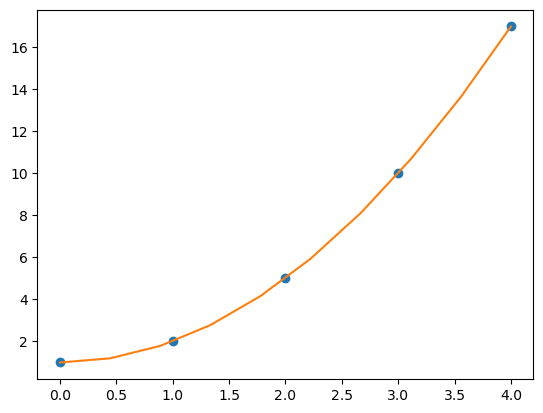

In [8]:
plt.plot(x,y,'o')
plt.plot(xx,yy)

In [9]:
s = np.abs(y.T-f(x))

In [10]:
sm = 0
for i in range(5):
    sm += s[0][i]
sm

7.438494264988549e-15

# 3)

In [22]:
def newton_convergence(r, X):
    error = [[abs(r-X[0]), None]]
    for i in range(len(X)):
        if i == 0: pass
        en = abs(r-X[i])
        error.append([en,abs(en/error[i-1][0]**2)])
    return error

In [23]:
def newton(f, df, x0, nmax):
    x = x0
    iterates = [x0]
    for n in range(nmax):
        x = x - f(x)/df(x)
        iterates.append(x)
    return iterates

In [32]:
f = lambda x: (x-2)**2*(x-8)
df = lambda x: 2*(x-2)*(x-8) + (x-2)**2
x0 = 4.6
n_max = 12

In [33]:
X = newton(f, df, x0, n_max)
X

[4.6,
 2.4952380952380957,
 2.2359558316080057,
 2.11551269701365,
 2.0571838498246477,
 2.0284536991469393,
 2.0141928740161,
 2.0070880138845992,
 2.0035419098954574,
 2.0017704317708964,
 2.0008850852264235,
 2.000442509965327,
 2.0002212468227993]

In [34]:
newton_convergence(2,X)

[[2.5999999999999996, None],
 [2.5999999999999996, 0.3846153846153847],
 [0.4952380952380957, 0.07326007326007335],
 [0.2359558316080057, 0.03490470881775233],
 [0.11551269701365019, 0.47097909932525556],
 [0.05718384982464775, 1.027098179954577],
 [0.028453699146939293, 2.132452112925876],
 [0.014192874016099921, 4.340338160257631],
 [0.007088013884599231, 8.754817335082256],
 [0.00354190989545744, 17.583155353097872],
 [0.001770431770896419, 35.239527390130704],
 [0.0008850852264234987, 70.55212096372878],
 [0.00044250996532690934, 141.17723323025163],
 [0.00022124682279933694, 282.4274204145546]]

In [35]:
def newton_modified(f, df, x0, nmax):
    x = x0
    iterates = [x0]
    for n in range(nmax):
        x = x - 2*f(x)/df(x)
        iterates.append(x)
    return iterates

In [37]:
X = newton_modified(f, df, x0, 5)
X

[4.6,
 0.39047619047619175,
 1.8460613900342255,
 1.9980984235394217,
 1.9999996988104307,
 1.9999999999999925]

In [38]:
newton_convergence(2,X)

[[2.5999999999999996, None],
 [2.5999999999999996, 0.3846153846153847],
 [1.6095238095238082, 0.23809523809523797],
 [0.15393860996577446, 0.022771983722747708],
 [0.0019015764605783136, 0.0007340387408660741],
 [3.0118956928504304e-07, 1.2709978213515224e-05],
 [7.549516567451064e-15, 2.087812806465376e-09]]